# Lecture 17 Mathematical Modeling of Pandemics using Python

- Solving non-linear equations using SciPy
- Modeling the dynamic evolution of Pandemics using the SIR model

## 1. The exponential model

### Assumptions
- Starting from day 0, there was $I_0$ infected, mathematically it's denoted as $I[0] = I_0$, where $I[t]$ is the number of infected as a function of day ($t$)
- everyday, one infected patient creates $R_0$ new infections, which means after one day, the newly infected number is $R_0\cdot I[t]$

### Recurrence relation

$$I[n+1] = I[n] + R_0\cdot I[n]$$

here $I[n]$ is the number of infections on day $n$, $I[n+1]$ is the number of infections on day $n+1$, $R_0$ is the infection rate, e.g., one patient can get $R_0$ person infected everyday.

The python implememtation is quite straightforward using a for-loop

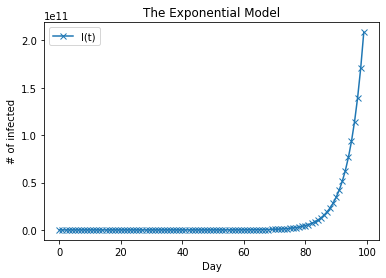

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# simuation Time / Day
T = 100

# Base infection rate - increases 22.2% every day
R0 = 0.222 # play with R0 and see the changes in the curve

I = np.zeros(T)

I[0]=500 # on day 0 we had 1 patient

for n in range(T-1):
    I[n+1] = I[n] + I[n]*R0

plt.plot(I,'-x',label='I(t)')
plt.xlabel('Day')
plt.ylabel('# of infected')
plt.title('The Exponential Model')
plt.legend()
plt.show()

After 70 days the total number of infected goes from $1$ to $10^{11}$. Is it a good model?

## 2. The S-I model

### Problem with the Exponential Model: 
- Infections grow without boundary - only have limited population!

### How to improve the Exponential Model: 
- Introduce a total population $S$ (susceptible), so the potential infections actually decrease with day

### Assumptions
- The total population that can be infected is fixed, say it's $S[n]=N_0$
- Starting from day 0, there was $I_0$ infected, mathematically it's denoted as $I[0] = I_0$, where $I[n]$ is the number of infected as a function of day $n$
- everyday, intections are through contact described by the contact rate $\lambda$. Among the suceptible $S[n]$, the existing infected patients create $\lambda\cdot I[n]\cdot S[n]$ new infections, which is added to I[n]
- $\lambda\cdot I[n]\cdot S[n]$ is removed from $S[n]$

### Parameters

- $\lambda$: contact rate

### Recurrence relations

$$I[n+1] = I[n] + \lambda\cdot I[n]\cdot S[n]$$
$$S[n+1] = S[n] - \lambda\cdot I[n]\cdot S[n]$$

here $I[n]$ is the number of infections on day $n$, $I[n+1]$ is the number of infections on day $n+1$; here $S[n]$ is the number of suspectible on day $n$, $S[n+1]$ is the suspectible on day $n+1$ $\lambda$ is the contact rate, e.g., for SARS, $\lambda$ is estimated between 0.2 and 1.0

The python implememtation is quite straightforward using a for-loop

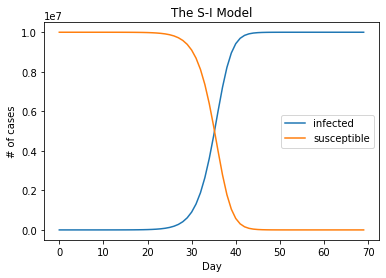

In [136]:
# population, S[n]
N = 1e7
# simuation Time / Day
T = 70
# susceptiable
s = np.zeros([T])
# infected
i = np.zeros([T])
# contact rate
lamda = 0.5

# initial infective people
i[0] = 5 / N # initially 5 infections, divided by N so in the for loop we're computing the "infection rate"
s[0] = 1     # initially the whole population is susceptibe, so S[0] = 100% (1.0)

for n in range(T-1): # step through day 0 to day T-2
    s[n + 1] = s[n] - lamda * i[n] * s[n] # changes in S[n]
    i[n + 1] = i[n] + lamda * i[n] * s[n] # changes in I[n]
    
plt.plot(i*N,label='infected')
plt.plot(s*N,label='susceptible')
plt.xlabel('Day')
plt.ylabel('# of cases')
plt.title('The S-I Model')
plt.legend()
plt.show()

We can also see the effect of contact rate $\gamma$ on the number of total infection - it is clear that with a lower contact rate, the infection time gets delayed

0.4
0.55
0.7
0.85
1.0


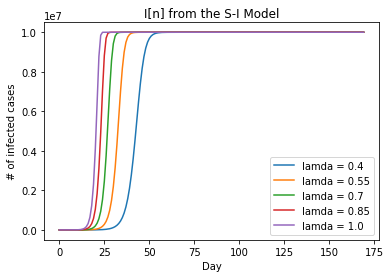

In [142]:
# initial infective people

for lamda in np.linspace(0.4,1.0,5):
    
    print(lamda)
    
    i[0] = 5 / N
    s[0] = 1   
    for n in range(T-1):
        s[n + 1] = s[n] - i[n] * lamda * s[n]
        i[n + 1] = i[n] + i[n] * lamda * s[n]
    
    plt.plot(i*N,label='lamda = '+str(lamda))
    #plt.plot(s*N,label='susceptible')
    
plt.xlabel('Day')
plt.ylabel('# of infected cases')
plt.title('I[n] from the S-I Model')
plt.legend()
'lamda = '+str(lamda)
plt.show()

Now the total infection is no longer growing out of bound, but what's the problem here now?

## 2. The S-I-S model

### Problem with the S-I Model: 
- Nobody gets cured (some people recover from the disease everyday!)

### How to improve the S-I Model: 
- Introduce a cure factor to the infected population $I$, so the total infections decrease with day

### Populations

- $S[n]$: Susceptible
- $I[n]$: Infected

### Assumptions
- The total population that can be infected is fixed, say it's $S[n]=N_0$
- Starting from day 0, there was $I_0$ infected, mathematically it's denoted as $I[0] = I_0$, where $I[n]$ is the number of infected as a function of day $n$
- everyday, intections are through contact described by the contact rate $\lambda$. Among the suceptible $S[n]$, the existing infected patients create $\lambda\cdot I[n]\cdot S[n]$ new infections, which is added to I[n]
- everyday, recovery (cured) are due to medical care described by the recover rate $\gamma$. $\gamma\cdot I[n]$ is removed from $I[n]$ (cured)
- the cured does not have immunity, so they are possibly infected again, so the $\gamma\cdot I[n]$ is added back to $S[n]$

### Parameters

- $\lambda$: contact rate
- $\gamma$: recover rate

### Recurrence relations

$$I[n+1] = I[n] + \lambda\cdot I[n]\cdot S[n] - \gamma\cdot I[n]$$
$$S[n+1] = S[n] - \lambda\cdot I[n]\cdot S[n] + \gamma\cdot I[n]$$

here $I[n]$ is the number of infections on day $n$, $I[n+1]$ is the number of infections on day $n+1$; here $S[n]$ is the number of suspectible on day $n$, $S[n+1]$ is the suspectible on day $n+1$ $\lambda$ is the contact rate, $\gamma$ is the recovery rate, e.g., for SARS, $\lambda$ is estimated between 0.2 and 1.0, and $\gamma$ is between 0.01 to 0.2

The python implememtation of the S-I-S model is quite straightforward using a for-loop

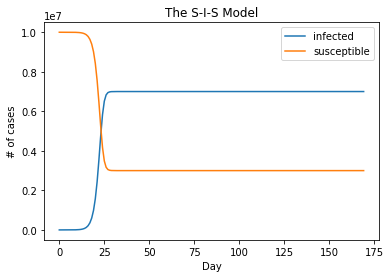

In [143]:
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])

# contact rate
lamda = 1.0
# recover rate
gamma = 0.3

# initial infective people
i[0] = 45.0 / N
s[0] = 1.0

for n in range(T-1): # step through day 0 to day T-1
    
    s[n + 1] = s[n] - lamda * i[n] * s[n] + gamma*i[n]
    i[n + 1] = i[n] + lamda * i[n] * s[n] - gamma*i[n]

plt.plot(i*N,label='infected')
plt.plot(s*N,label='susceptible')
plt.xlabel('Day')
plt.ylabel('# of cases')
plt.title('The S-I-S Model')
plt.legend()
plt.show()

We can also see the effect of $\gamma$ on the number of infection - the higher $\gamma$ is (basically it's the rate of removing infections), the lower the final infection is.

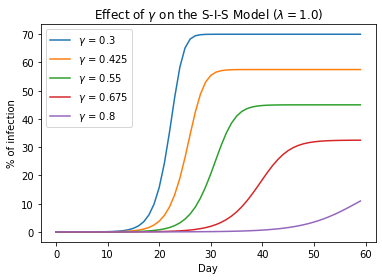

In [144]:
# population
N = 1e7
# simuation Time / Day
T = 60
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])

# contact rate
lamda = 1.0

# recover rate
for gamma in np.linspace(0.3,0.8,5):

    # initial infective people
    i[0] = 45.0 / N
    s[0] = 1.0

    for n in range(T-1): # step through day 0 to day T-1
    
        s[n + 1] = s[n] - lamda * i[n] * s[n] + gamma*i[n]
        i[n + 1] = i[n] + lamda * i[n] * s[n] - gamma*i[n]

    plt.plot(i*100,label='$\gamma$ = '+str(gamma)) #i*100 is the percentage

plt.xlabel('Day')
plt.ylabel('% of infection')
plt.title('Effect of $\gamma$ on the S-I-S Model ($\lambda ='+str(lamda)+'$)')
plt.legend()
plt.show()

## 2. The S-I-R model

### Problem with the S-I-S Model: 
- In most infectiou diseases, when people recover (cured) from the illness, they acquire immunity, which means they are no longer belong to the susceptible population and should be removed from the picture

### How to improve the S-I-S Model: 
- Introduce a new population called "removed" ($R[n]$), so the both the susceptible and infected decrease with cure

### Populations

- $S[n]$: Susceptible
- $I[n]$: Infected
- $R[n]$: Removed

### Assumptions
- The total population that can be infected is fixed, say it's $S[n]=N_0$
- Starting from day 0, there was $I_0$ infected, mathematically it's denoted as $I[0] = I_0$, where $I[n]$ is the number of infected as a function of day $n$
- everyday, intections are through contact described by the contact rate $\lambda$. Among the suceptible $S[n]$, the existing infected patients create $\lambda\cdot I[n]\cdot S[n]$ new infections, which is added to I[n]
- everyday, recovery (cured) are due to medical care described by the recover rate $\gamma$. $\gamma\cdot I[n]$ is removed from $I[n]$ (cured)
- the cured now have immunity, so they are no longer susceptible, so the $\gamma\cdot I[n]$ is moved to a new population called $R[n]$ (removed)

### Parameters

- $\lambda$: contact rate
- $\gamma$: recover rate


### Recurrence relations

$$S[n+1] = S[n] - \lambda\cdot I[n]\cdot S[n]\;\;\;\;\;\;\;\;\;\;\;\; \;\;$$
$$I[n+1] = I[n] + \lambda\cdot I[n]\cdot S[n] - \gamma\cdot I[n]$$
$$R[n+1] = R[n] + \gamma\cdot I[n]\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\;$$


here $I[n]$ is the number of infections on day $n$, $I[n+1]$ is the number of infections on day $n+1$; here $S[n]$ is the number of suspectible on day $n$, $S[n+1]$ is the suspectible on day $n+1$ $\lambda$ is the contact rate; and $R[n+1]$ is the removed on day $n+1$. $\lambda$ is the contact rate $\gamma$ is the recovery rate, e.g., for SARS, $\lambda$ is estimated between 0.2 and 1.0, and $\gamma$ is between 0.01 to 0.2

The python implememtation of the S-I-S model is quite straightforward using a for-loop

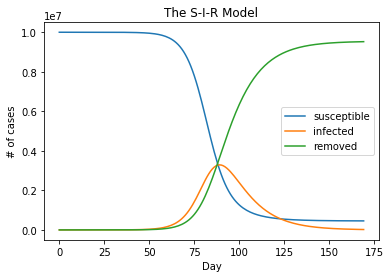

In [146]:
N = 1e7 # initial susceptible population, 1M
# simuation Time / Day
T = 170
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])

# contact rate
lamda = 0.2586
# recover rate
gamma = 0.0821

# initial infective people
i[0] = 10.0 / N # at day 0 there were 10 infections
s[0] = 1.0 # 100% of the population is susceptible

for n in range(T-1):
    s[n + 1] = s[n] - lamda * i[n] * s[n]
    i[n + 1] = i[n] + lamda * i[n] * s[n] - gamma*i[n]
    r[n + 1] = r[n] + gamma*i[n]

plt.plot(s*N,label='susceptible') # since i is the infection rate, i*N gives the actually # of infected persons
plt.plot(i*N,label='infected') # same for s here
plt.plot(r*N,label='removed')
plt.xlabel('Day')
plt.ylabel('# of cases')
plt.title('The S-I-R Model')
plt.legend()
plt.show()

Now play with the parameters $\lambda$ and $\gamma$ in the S-I-R model and see the changes in the peak of the infection population - what does that indicate about measures for public health?